In [43]:
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Sun Jun 11 07:24:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+-------------------

In [1]:
import os
home = os.getcwd()
home


'/content'

In [2]:
#!pip install ultralytics
from IPython import display
display.clear_output()
!yolo mode = checks

WARNING  'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.115  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete  (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display,Image

In [4]:
!mkdir {home}/datasets
%cd {home}/datasets

#!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="S8fMgPvlPiRbJvTmRrKW")
project = rf.workspace().project("cars_detection-ilelz")
datasets = project.version(1).download('yolov8')

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.115, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to cars_detection-1 in yolov8:: 100%|██████████| 156/156 [00:00<00:00, 1207.68it/s]


In [5]:
%cd {home}

!yolo task=detect mode=train model=yolov8s.pt data={datasets.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 161MB/s]
Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/cars_detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

In [6]:
!ls {home}/runs/detect/train/

args.yaml					     R_curve.png
confusion_matrix_normalized.png			     results.csv
confusion_matrix.png				     results.png
events.out.tfevents.1686468550.a2581d246d89.17446.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
labels_correlogram.jpg				     train_batch2.jpg
labels.jpg					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights


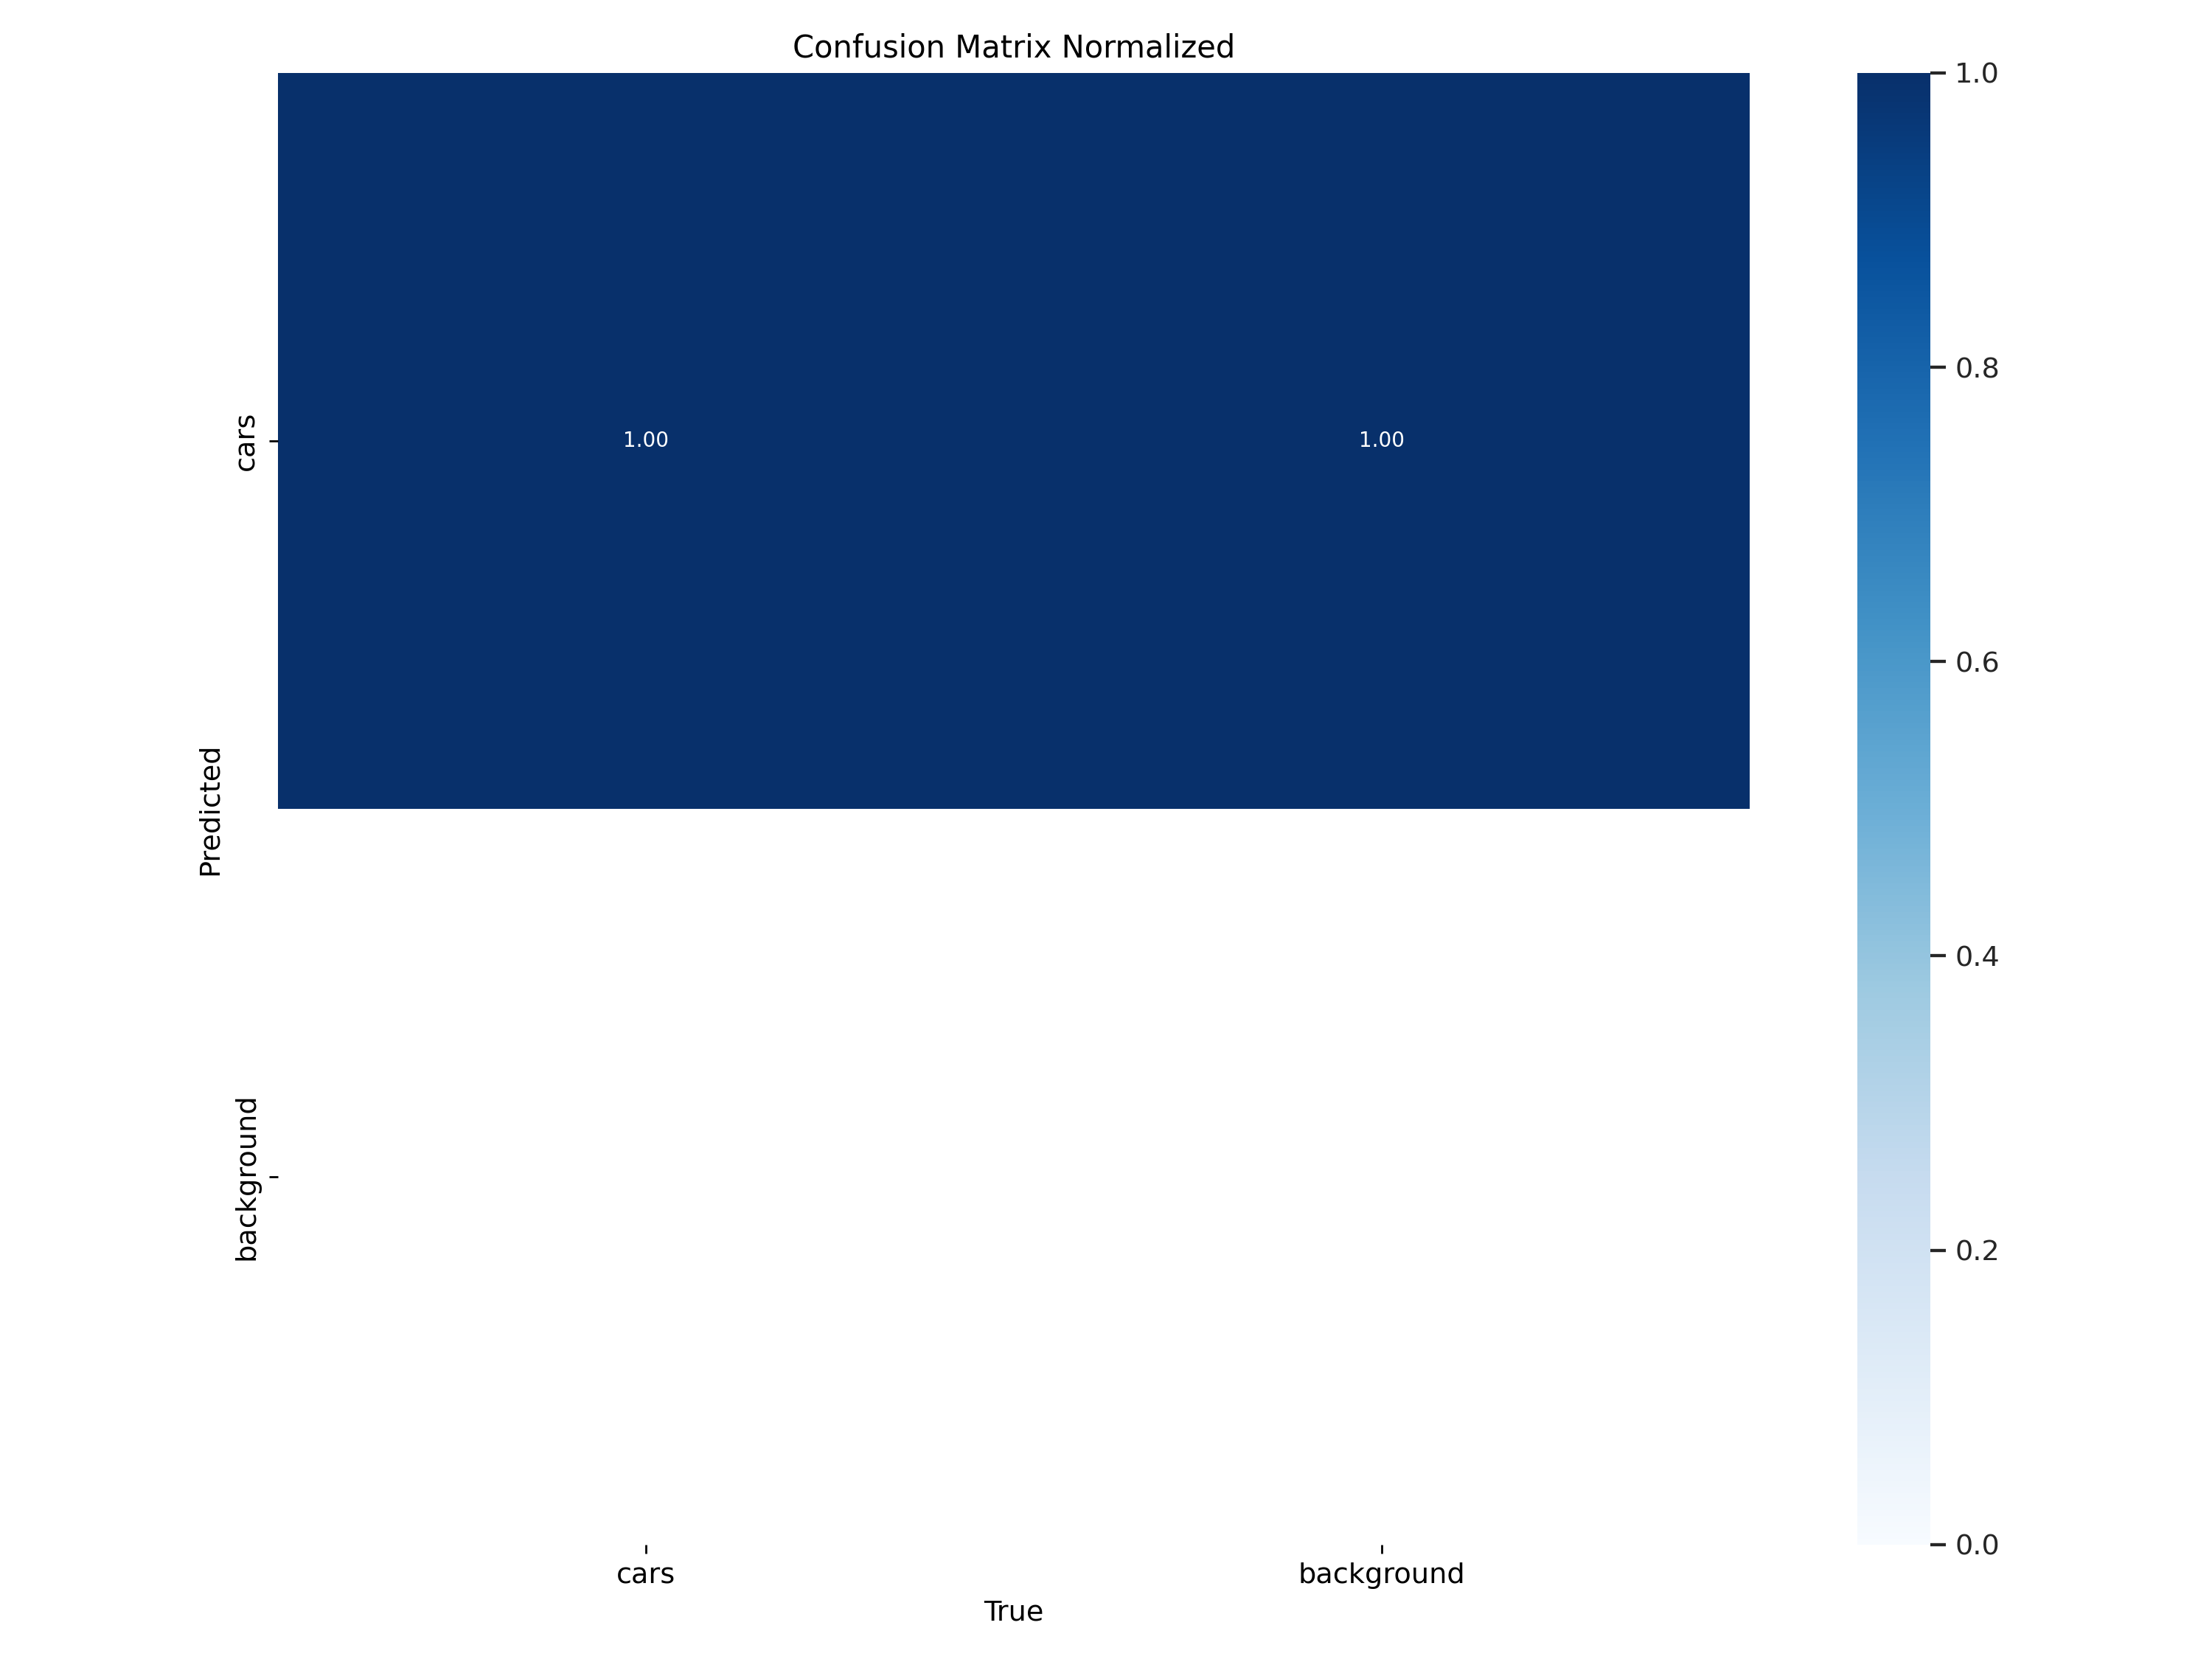

In [7]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png',width=800)

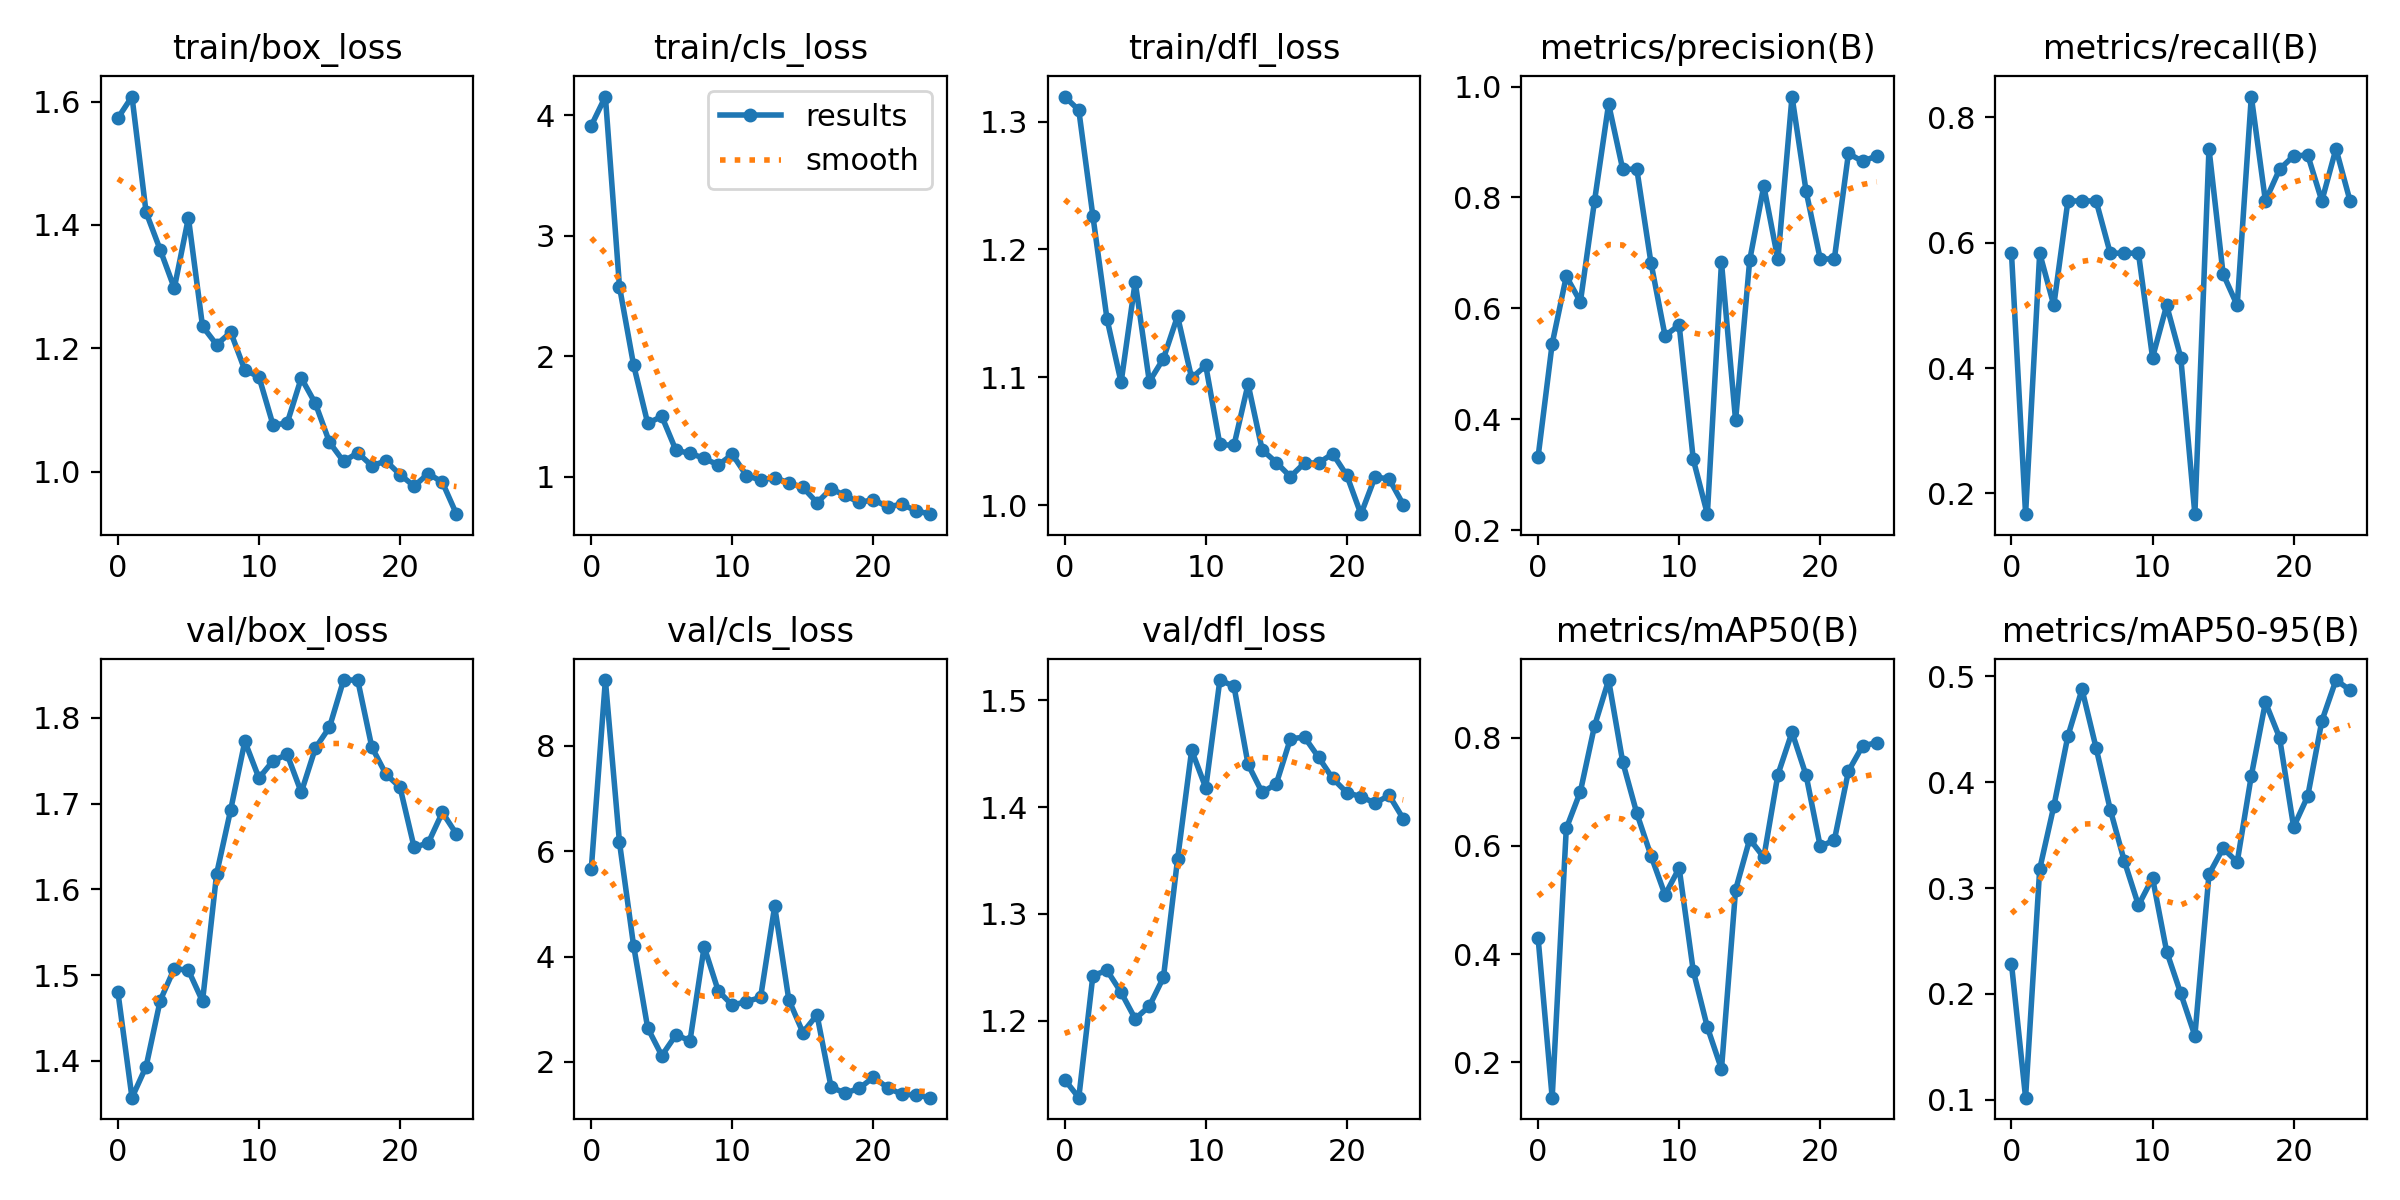

In [8]:
Image(filename=f'/content/runs/detect/train/results.png',width=800)

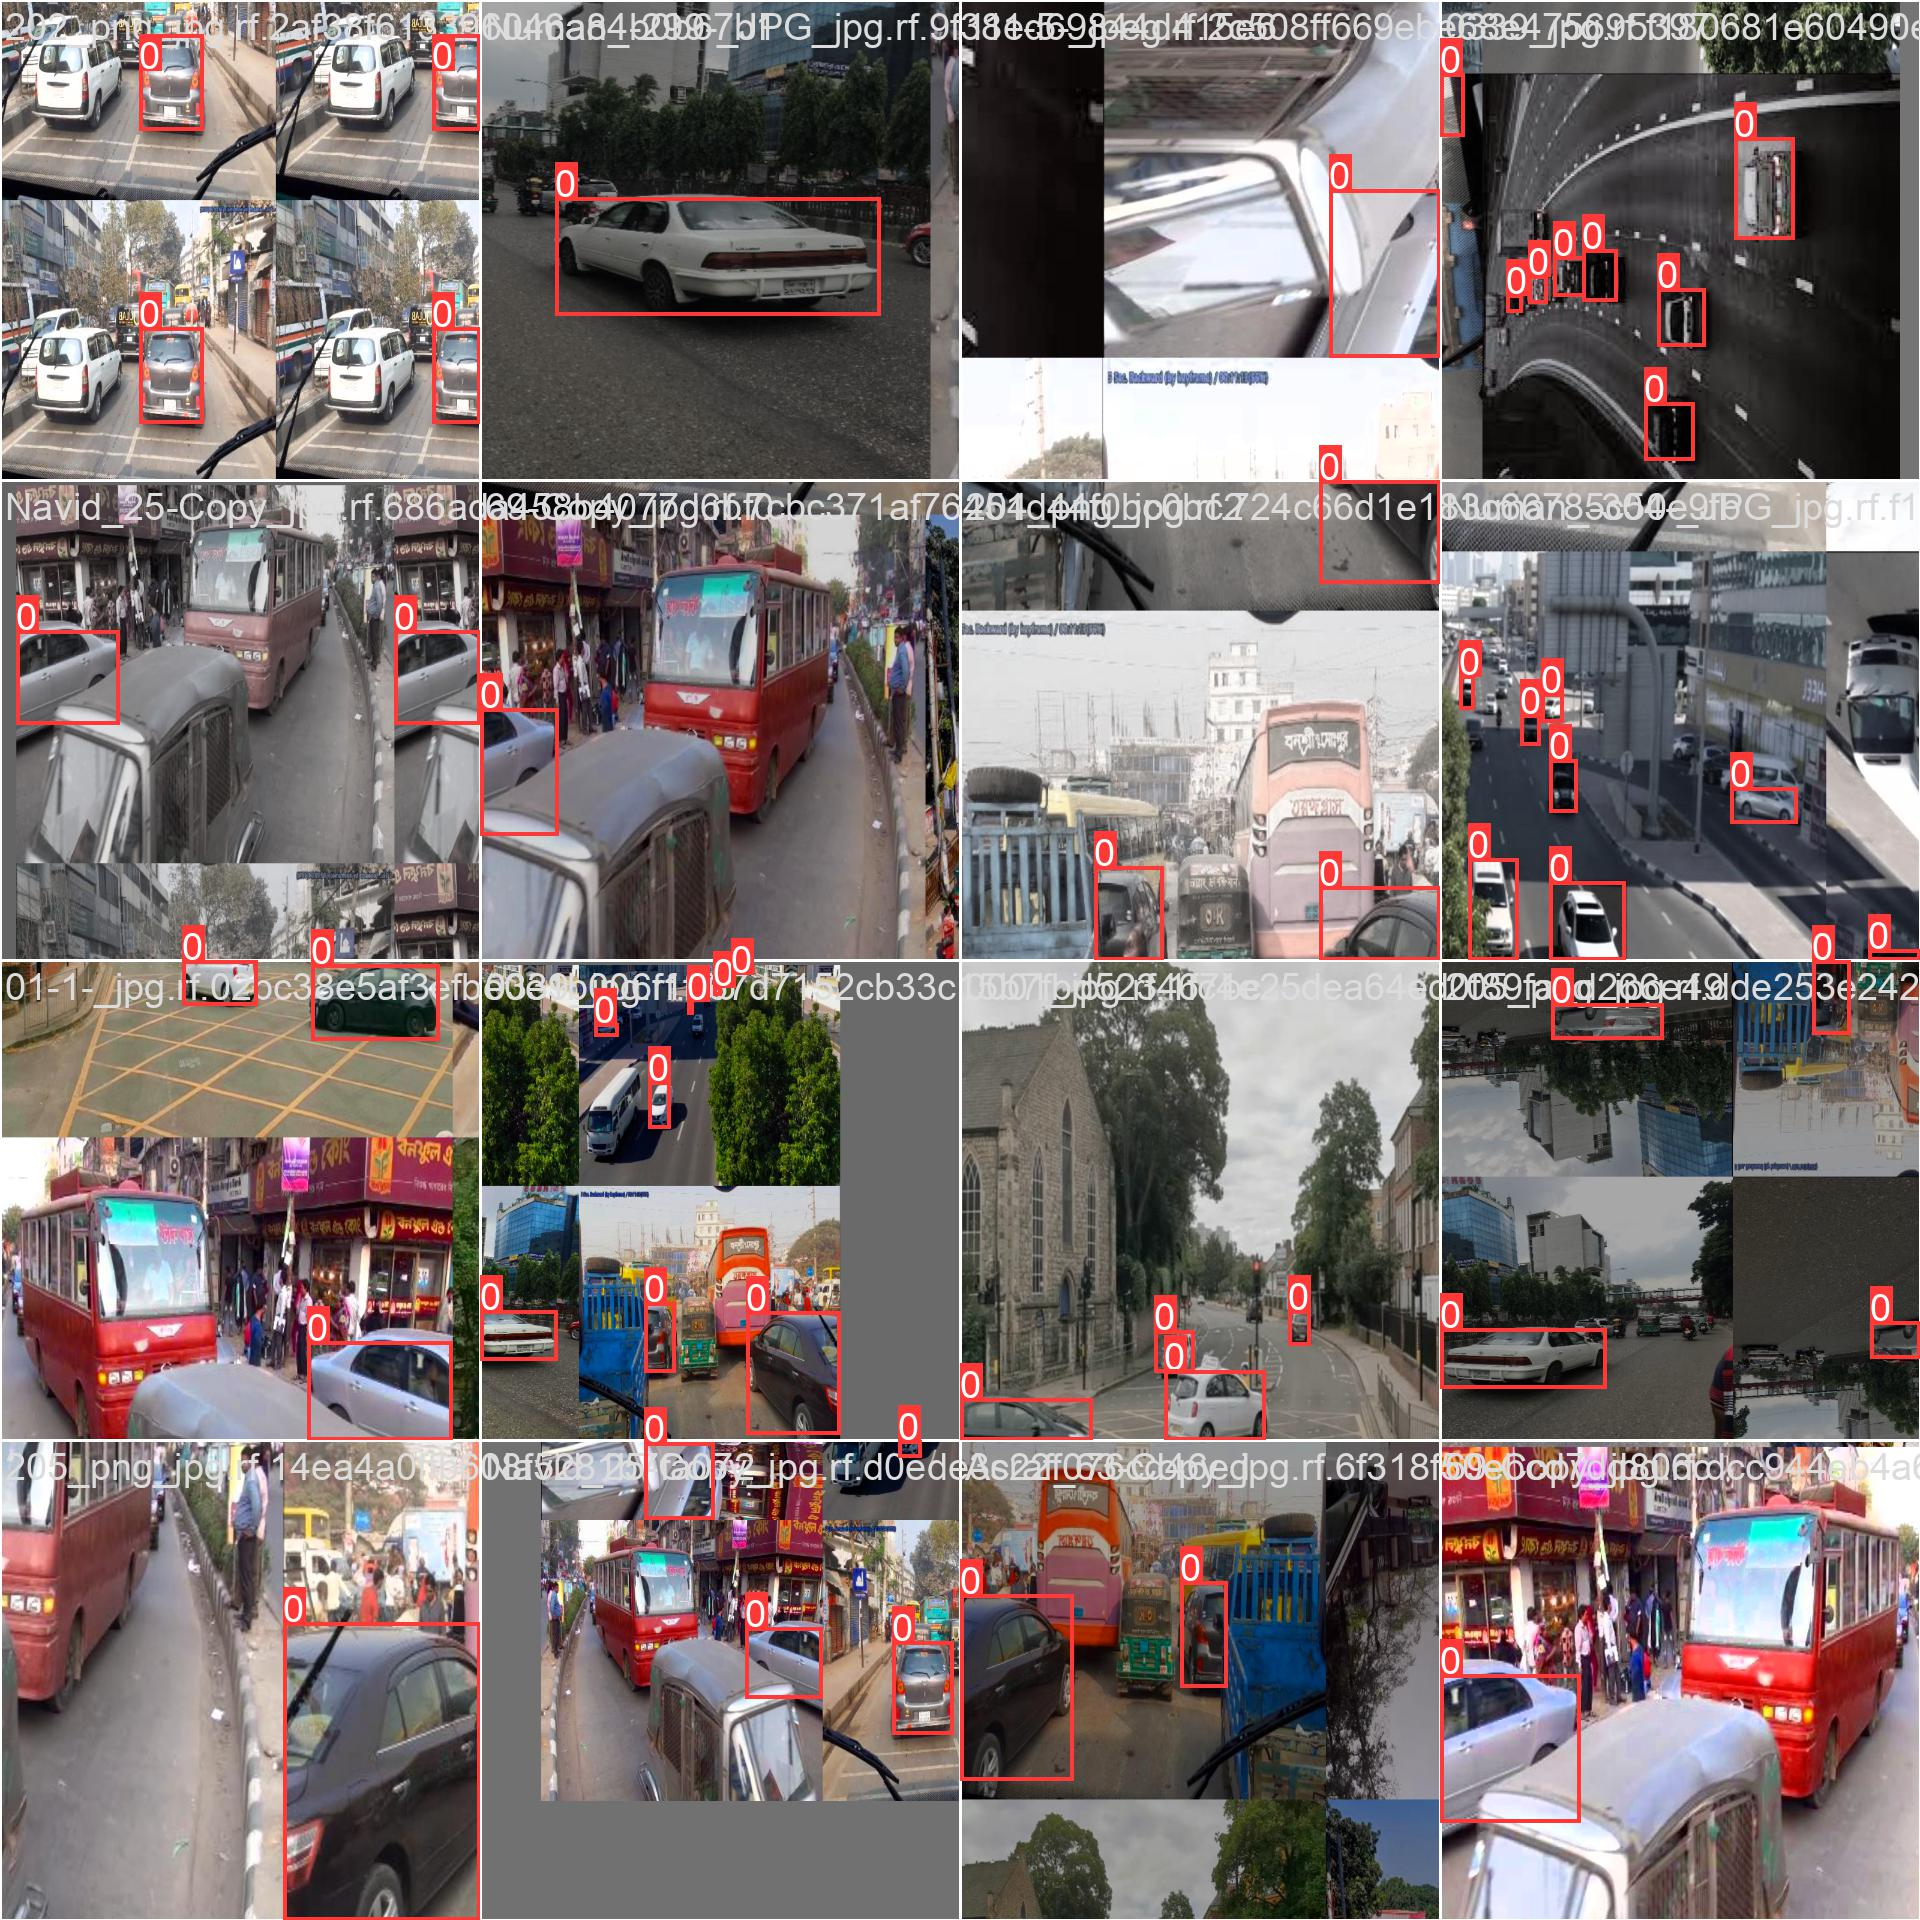

In [9]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg',width=800)

In [10]:
!yolo task=detect \
mode=val \
model={home}/runs/detect/train/weights/best.pt \
data={datasets.location}/data.yaml

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/cars_detection-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  4.72it/s]
                   all          6         12      0.969      0.667      0.907      0.488
Speed: 0.3ms preprocess, 22.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val


In [11]:
!yolo task=detect \
mode=predict \
model={home}/runs/detect/train/weights/best.pt \
conf=0.25 \
source={datasets.location}/test/images

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/3 /content/datasets/cars_detection-1/test/images/01-2-_jpg.rf.8bae6da0c9ee5da1b86b6e6fa43e8228.jpg: 800x800 6 carss, 25.3ms
image 2/3 /content/datasets/cars_detection-1/test/images/111-4-_jpeg.rf.a3f4596783ed3b94276e085861d900c5.jpg: 800x800 16 carss, 24.6ms
image 3/3 /content/datasets/cars_detection-1/test/images/Navid_362_jpg.rf.b12a1c491b1347981f24fbe274db4f1d.jpg: 800x800 2 carss, 24.6ms
Speed: 5.0ms preprocess, 24.8ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict


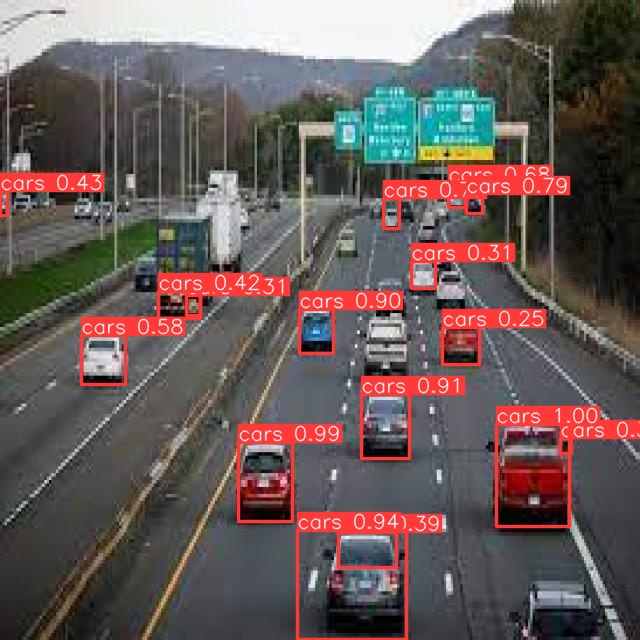

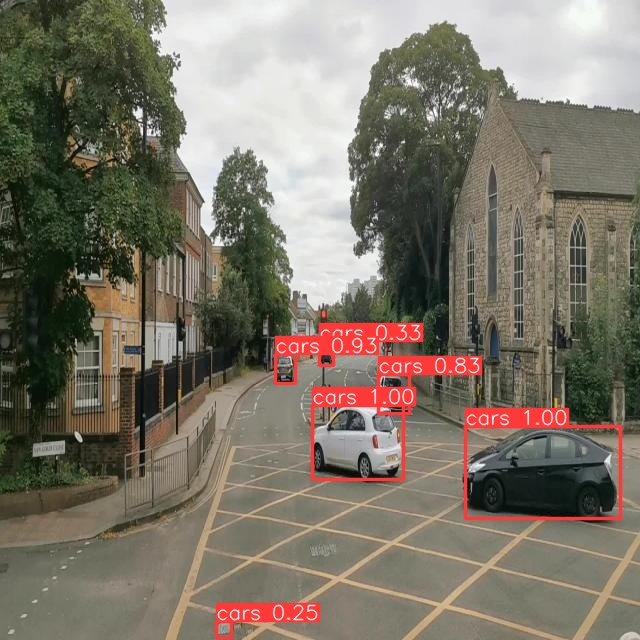

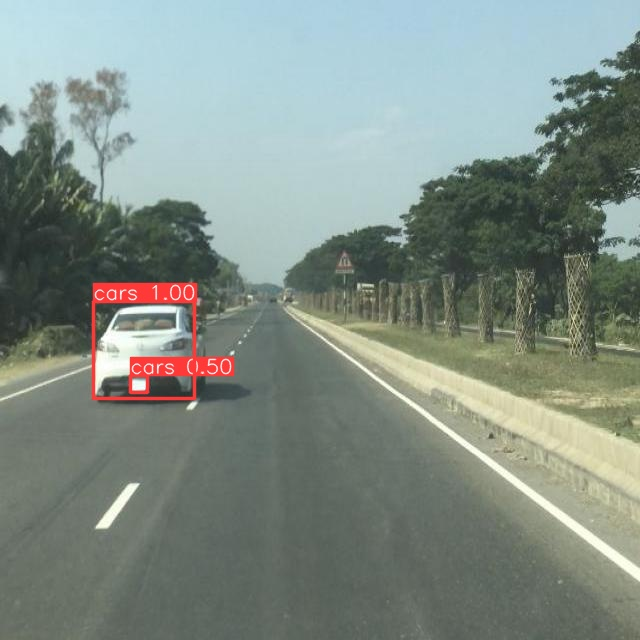

In [12]:
import glob
for img in glob.glob('/content/runs/detect/predict/*.jpg'):
  display(Image(filename=img,width=600))
  print('\n')

In [42]:
#!rm -rf '/content'

# Image Segmentation

In [13]:
%cd {home/segmentation}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true


[Errno 2] No such file or directory: '{home/segmentation}'
/content
100% 22.8M/22.8M [00:00<00:00, 173MB/s]
Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 123MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 74.4ms
Speed: 2.6ms preprocess, 74.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


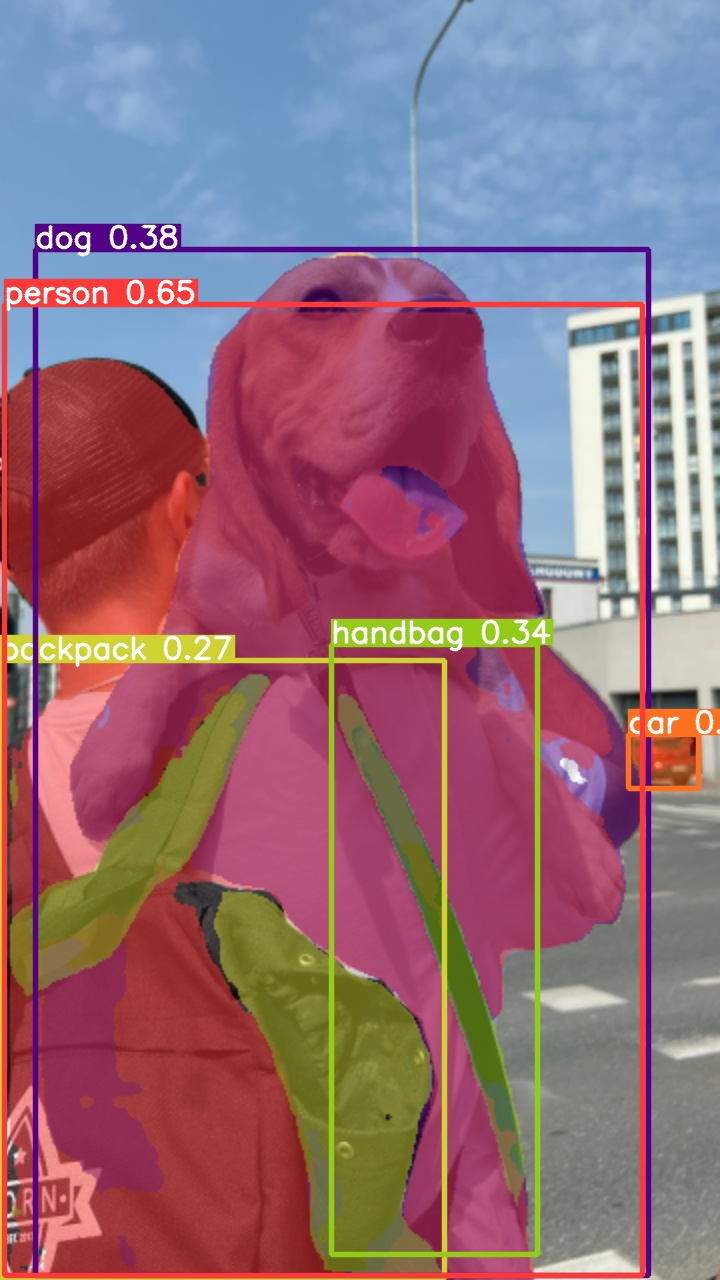

In [14]:
display(Image(filename='/content/runs/segment/predict/dog.jpeg',width=600))